In [132]:
from scipy.stats import chi2_contingency
import cogent3
from cogent3 import get_app
import matplotlib.pyplot as plt
import paths
import libs
import pandas as pd
import numpy as np

In [90]:
folder_in = paths.DATA_APES114 + 'cds/codon_aligned'
in_dstore = cogent3.open_data_store(folder_in, suffix='fa', mode='r')

loader = get_app("load_aligned", moltype="dna")   
omit_degs_cds = get_app("omit_degenerates", moltype="dna", motif_length=3)
concat = get_app("concat", moltype="dna")

#create a concatenated alignment with all coding positions
cdsall_process = loader + omit_degs_cds
# result below is only valid alignments (no NotCompleted).
results_cdsall = [r for r in cdsall_process.as_completed(in_dstore[:], parallel=True) if r]
cdsall_alns = concat(results_cdsall)
cdsall_alns.source = "cds_alignments"

#Do a General nucleotide substitution model
#time_het=max sets a 36 params substitution model
sm_cds = get_app("model", "GN", time_het="max", optimise_motif_probs=True, show_progress=True)
result_cdsall = sm_cds(cdsall_alns)

lengthstree_cdsall = result_cdsall.lf.get_lengths_as_ens()
humanENS_cdsall = lengthstree_cdsall['Human']

print("Distances: ")
print(lengthstree_cdsall)

result_cdsall.lf


   0%|          |00:00<?

   0%|          |00:00<?

   0%|          |00:00<?

Distances: 
{'Human': np.float64(0.0044407237281505465), 'Chimpanzee': np.float64(0.006845846790749173), 'Gorilla': np.float64(0.008566217492292168)}


GN
log-likelihood = -817632.5312
number of free parameters = 39
======================================================================
edge          parent    length     A>C     A>G     A>T     C>A     C>G
----------------------------------------------------------------------
Human         root        0.00    1.17    4.05    0.62    1.43    1.74
Chimpanzee    root        0.01    0.99    2.08    0.76    0.87    1.20
Gorilla       root        0.01    1.22    3.24    0.79    1.18    1.64
----------------------------------------------------------------------

continued: 
============================================
 C>T     G>A     G>C     G>T     T>A     T>C
--------------------------------------------
7.54    6.41    1.46    1.15    0.83    3.59
3.24    2.83    1.41    0.92    0.64    2.30
5.13    4.57    1.69    1.32    0.69    3.76
--------------------------------------------

============================
   A       C       G       T
----------------------------
0.23    0.30    0.29    0.19
----------------------------

In [91]:
folder_in = paths.DATA_APES114 + 'intergenicAR/'
in_dstore = cogent3.open_data_store(folder_in, suffix='fa', mode='r')
results_interAR = [r for r in noncds_app.as_completed(in_dstore[:], parallel=True) if r]
alns_interAR = concat(results_interAR)
alns_interAR.source = "intergenicAR_alignments"
sm = get_app("model", "GN", time_het="max", optimise_motif_probs=True, show_progress=True)
result_intergenicAR = sm(alns_interAR)

lengthstree_intergenicAR = result_intergenicAR.lf.get_lengths_as_ens()
humanENS_interAR = lengthstree_intergenicAR["Human"]

print("Distances: ")
print(lengthstree_intergenicAR)

result_intergenicAR.lf

   0%|          |00:00<?

   0%|          |00:00<?

   0%|          |00:00<?

Distances: 
{'Human': np.float64(0.007596074649651058), 'Chimpanzee': np.float64(0.008387221140193062), 'Gorilla': np.float64(0.012639653618161346)}


GN
log-likelihood = -3638201.6185
number of free parameters = 39
======================================================================
edge          parent    length     A>C     A>G     A>T     C>A     C>G
----------------------------------------------------------------------
Human         root        0.01    0.97    3.95    0.81    1.38    1.47
Chimpanzee    root        0.01    1.04    3.52    0.89    1.19    1.42
Gorilla       root        0.01    0.93    4.27    0.66    1.22    1.41
----------------------------------------------------------------------

continued: 
============================================
 C>T     G>A     G>C     G>T     T>A     T>C
--------------------------------------------
6.99    7.05    1.42    1.35    0.71    3.77
6.61    6.55    1.46    1.23    0.82    3.56
6.59    6.62    1.41    1.31    0.76    3.98
--------------------------------------------

============================
   A       C       G       T
----------------------------
0.26    0.23    0.23    0.27
----------------------------

In [92]:
folder_in = paths.DATA_APES114 + 'introns/'
in_dstore = cogent3.open_data_store(folder_in, suffix='fa', mode='r')

loader = get_app("load_aligned", moltype="dna")
omit_degs_noncds = get_app("omit_degenerates", moltype="dna")
rename_noncds = libs.renamer_noncds_aligned()
concat = get_app("concat", moltype="dna")

noncds_app = loader + omit_degs_noncds + rename_noncds
#By using this renamer_aligned function I throw away sequences with paralogs
results_allpos = [r for r in noncds_app.as_completed(in_dstore[:], parallel=True) if r]
alns_introns = concat(results_allpos)
alns_introns.source = "introns_alignments"

sm = get_app("model", "GN", time_het="max", optimise_motif_probs=True, show_progress=True)
result_introns = sm(alns_introns)

lengthstree_introns = result_introns.lf.get_lengths_as_ens()
humanENS_intron = lengthstree_introns["Human"]

print("Distances: ")
print(lengthstree_introns)

result_introns.lf

   0%|          |00:00<?

   0%|          |00:00<?

   0%|          |00:00<?

Distances: 
{'Human': np.float64(0.005807745289820156), 'Chimpanzee': np.float64(0.006067053520039309), 'Gorilla': np.float64(0.009924379352868506)}


GN
log-likelihood = -10543588.5646
number of free parameters = 39
======================================================================
edge          parent    length     A>C     A>G     A>T     C>A     C>G
----------------------------------------------------------------------
Human         root        0.01    1.03    4.06    0.60    1.16    1.52
Chimpanzee    root        0.01    0.98    3.66    0.61    1.02    1.51
Gorilla       root        0.01    1.01    4.67    0.64    1.17    1.64
----------------------------------------------------------------------

continued: 
============================================
 C>T     G>A     G>C     G>T     T>A     T>C
--------------------------------------------
6.76    6.79    1.55    1.20    0.59    4.01
6.01    6.10    1.39    1.03    0.60    3.43
6.45    6.52    1.65    1.16    0.65    4.58
--------------------------------------------

============================
   A       C       G       T
----------------------------
0.25    0.25    0.25    0.25
----------------------------

In [108]:
params_interest = ['G>T','G>C','G>A','T>C','T>A','C>G','C>T','C>A','A>G','A>T','A>C']
species_interest = ['Human']
dim = result_intergenicAR.lf.get_used_dimensions('G>T')
subs_rates_dict = result_intergenicAR.lf.get_param_value_dict(dim)
subs_rates_intergenicAR = pd.DataFrame.from_dict(subs_rates_dict) 
subs_rates_intergenicAR = subs_rates_intergenicAR[params_interest]
Human_subs_rates_intergenicAR = subs_rates_intergenicAR.loc[species_interest]
Human_subs_rates_intergenicAR.index = Human_subs_rates_intergenicAR.index + "_intergenicAR"

In [116]:
params_interest = ['G>T','G>C','G>A','T>C','T>A','C>G','C>T','C>A','A>G','A>T','A>C']
species_interest = ['Human']
dim = result_cdsall.lf.get_used_dimensions('G>T')
subs_rates_dict = result_cdsall.lf.get_param_value_dict(dim)
subs_rates_cds = pd.DataFrame.from_dict(subs_rates_dict) 
subs_rates_cds = subs_rates_cds[params_interest]
Human_subs_rates_cds = subs_rates_cds.loc[species_interest]
Human_subs_rates_cds.index = Human_subs_rates_cds.index + "_cds"

Human_subs_rates_cdsIGAR = pd.concat([Human_subs_rates_cds, Human_subs_rates_intergenicAR])

Proportion_cdsIGAR = Human_subs_rates_cdsIGAR.loc['Human_cds']/Human_subs_rates_cdsIGAR.loc['Human_intergenicAR']

In [110]:
stat, p, dof, expected = chi2_contingency(Human_subs_rates_cdsIGAR)
stat, p

(np.float64(0.15119111192670848), np.float64(0.9999999806818354))

In [118]:
subs_rates_dict = result_introns.lf.get_param_value_dict(dim)
subs_rates_introns = pd.DataFrame.from_dict(subs_rates_dict) 
subs_rates_introns = subs_rates_introns[params_interest]
Human_subs_rates_introns = subs_rates_introns.loc[species_interest]
Human_subs_rates_introns.index = Human_subs_rates_introns.index + "_introns"

Human_subs_rates_intronsIGAR = pd.concat([Human_subs_rates_introns, Human_subs_rates_intergenicAR])

Proportion_intronsIGAR = Human_subs_rates_intronsIGAR.loc['Human_introns']/Human_subs_rates_intronsIGAR.loc['Human_intergenicAR']

In [119]:
stat, p, dof, expected = chi2_contingency(Human_subs_rates_intronsIGAR)
stat, p

(np.float64(0.09110213422373344), np.float64(0.999999998426615))

In [120]:
type(Proportion_intronsIGAR)

pandas.core.series.Series

In [127]:
Proportions_data = pd.concat([Proportion_cdsIGAR.to_frame().T, Proportion_intronsIGAR.to_frame().T])
Proportions_data.index = ['cds_IGAR','introns_IGAR']
Proportions_data

,G>T,G>C,G>A,T>C,T>A,C>G,C>T,C>A,A>G,A>T,A>C
cds_IGAR,0.849586,1.031643,0.909302,0.950734,1.158314,1.186617,1.077993,1.035606,1.024469,0.760983,1.206069
introns_IGAR,0.888181,1.092142,0.962756,1.063271,0.826231,1.038833,0.965838,0.840289,1.027285,0.742706,1.063734


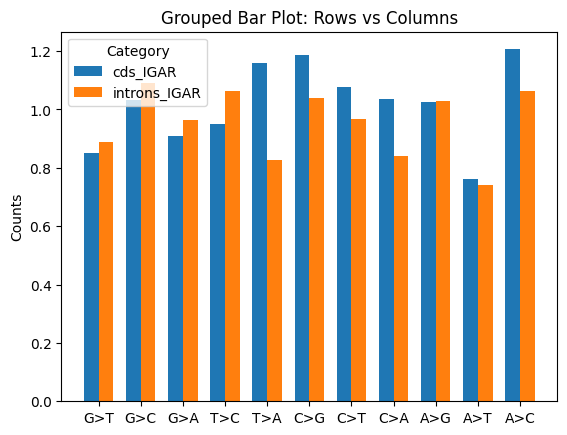

In [138]:
n_groups = Proportions_data.shape[1]
n_bars = Proportions_data.shape[0]

x = np.arange(n_groups)

fig, ax = plt.subplots()
width = 0.35

for i, row_label in enumerate(Proportions_data.index):
    ax.bar(x + i*width, Proportions_data.loc[row_label], width, label=row_label)

# Formatting
ax.set_xticks(x + width*(n_bars-1)/2)  # center labels under groups
ax.set_xticklabels(Proportions_data.columns)
ax.set_ylabel('Counts')
ax.set_title('Grouped Bar Plot: Rows vs Columns')
ax.legend(title='Category')

plt.show()

